# Payment Date Prediction 


### Importing related Libraries 

In [ ]:
import pandas as pd
import numpy as np
from fast_ml.feature_selection import get_constant_features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as le
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
import xgboost as xgb
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

### Store the dataset into the Dataframe


In [ ]:
#reading the dataset
df=pd.read_csv("dataset.csv")

### Check the shape of the dataframe


In [ ]:
df.shape
#50000 rows and 19 columns

(50000, 19)

### Check the Detail information of the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [ ]:
list(df.columns)
#displaying in a list format for conveniance

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'document_create_date',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'document type',
 'posting_id',
 'area_business',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 'isOpen']

### Describe the entire dataset

In [ ]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [ ]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.012% null

In [ ]:
#calculation percentage of null in all rows
percent_missing = df.isnull().sum() * 100 / len(df)
#storing then in a dataframe
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
#dropping all the percentages =0
missing_value_df = missing_value_df[missing_value_df.percent_missing != 0]
missing_value_df

,column_name,percent_missing
clear_date,clear_date,20.000
area_business,area_business,100.000
invoice_id,invoice_id,0.012


In [ ]:
#area_business : 100% null, clear_data : 20% null, invoice_id : 0.012% null

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [ ]:
df[['invoice_id', 'doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


In [ ]:
df['invoice_id'].corr(df['doc_id'])
#we can assume that both the columns are idemtical because their correlation coefficient =1 

1.0

#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [ ]:
da=df[['baseline_create_date', 'document_create_date','document_create_date.1']]
da
#creating a new dataset  to find the correlation matrix

,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113
...,...,...,...
49995,20200421.0,20200417,20200421
49996,20190815.0,20190814,20190815
49997,20200219.0,20200218,20200219
49998,20191127.0,20191126,20191127


In [ ]:
da.corr()

,baseline_create_date,document_create_date,document_create_date.1
baseline_create_date,1.000000,0.994078,0.999527
document_create_date,0.994078,1.000000,0.994547
document_create_date.1,0.999527,0.994547,1.000000


In [ ]:
#There is a strong correlation between all three columns, note to drop baseline_create_date and document_create_date later

#### Please check, Column 'posting_id' is constant columns or not


In [ ]:
df['posting_id'].unique()

array([1.])

In [ ]:
#posting_id is a constant column as only  one unique value is  returned when unique function is used

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [ ]:
df['isOpen'].value_counts()

0    40000
1    10000
Name: isOpen, dtype: int64

In [ ]:
#10000 values of 1 therfore c=using get_constant_features to check

In [ ]:
constant_features = get_constant_features(df)
constant_features['Var']

0       posting_id
1    area_business
2    document type
Name: Var, dtype: object

In [ ]:
#isOpen is not a constant column or  a quasi constant value now, but after split it will be constant

In [ ]:
df[['isOpen','clear_date']] [df['clear_date'].isna()]

,isOpen,clear_date
3,1,NaN
7,1,NaN
10,1,NaN
14,1,NaN
15,1,NaN
...,...,...
49975,1,NaN
49980,1,NaN
49982,1,NaN
49992,1,NaN


In [ ]:
#we can see that when isOpen is 1 clear_date is NaN 
#which means the invoice is still open therfore it is relevant for the future split

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [ ]:
df.shape

(50000, 19)

In [ ]:
df.drop(columns=['area_business','posting_id', 'invoice_id','document_create_date','isOpen',
                 'document type','document_create_date.1'], inplace=True)

In [ ]:
#area_of_business and posting_id are constant columns as seen earlier
#invoice_id is dropped because it is identical to doc_id
#document_create_date and document_create_date.1 are dropped as they are highly correlated to baseline_create_date
#document type becomes constant as it has X2 where invoice_id is null and we will drop null values
#isOpen is not needed as we can split the dataframe with the null values in clear_date

### Please check from the dataframe whether all the columns are removed or not 

In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200506.0,USD,3187.86,20200421.0,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190830.0,USD,6766.54,20190815.0,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200305.0,USD,6120.86,20200219.0,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191212.0,USD,63.48,20191127.0,NAA8


In [ ]:
#the shape of the  data reduced from 50000rows x 19columns to 50000 rows × 12 columns
#therfore columns are dropped successfully

### Show all the Duplicate rows from the dataframe

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [ ]:
print(df.duplicated().sum())
#there are 1161 duplicate rows in df

1161


### Drop all the Duplicate Rows

In [ ]:
df=df.drop_duplicates( keep='first')
df.shape

(48839, 12)

In [ ]:
#dropping all the duplicate values and keeping the first instance of a duplicated value 
#50000-1161=48839

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [ ]:
print(df.duplicated().sum())
#the number of duplicates is now 0

0


### Check for the number of Rows and Columns in your dataset

In [ ]:
df.shape

(48839, 12)

In [ ]:
#number of rows = 48839 and number of columns = 12

### Find out the total count of null values in each columns

In [ ]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

In [ ]:
#clear_date has 9681 null values

# Data type Conversion 

### Please check the data type of each column of the dataframe

In [ ]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [ ]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [ ]:
#need to get the format of dates correct or we will get a date from 1970
df['clear_date']=pd.to_datetime(df['clear_date'], format='%Y-%m-%d %H:%M:%S')
df['posting_date']=pd.to_datetime(df['posting_date'], format='%Y-%m-%d')
df['due_in_date']=pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/3428963719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clear_date']=pd.to_datetime(df['clear_date'], format='%Y-%m-%d %H:%M:%S')
C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/3428963719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['posting_date']=pd.to_datetime(df['posting_date'], format='%Y-%m-%d')
C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/3428963719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

### Please check the datatype of all the columns after conversion of the above 4 columns

In [ ]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

In [ ]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']]

,clear_date,posting_date,due_in_date,baseline_create_date
0,2020-02-11,2020-01-26,2020-02-10,2020-01-26
1,2019-08-08,2019-07-22,2019-08-11,2019-07-22
2,2019-12-30,2019-09-14,2019-09-29,2019-09-14
3,NaT,2020-03-30,2020-04-10,2020-03-31
4,2019-11-25,2019-11-13,2019-11-28,2019-11-13
...,...,...,...,...
49995,NaT,2020-04-21,2020-05-06,2020-04-21
49996,2019-09-03,2019-08-15,2019-08-30,2019-08-15
49997,2020-03-05,2020-02-19,2020-03-05,2020-02-19
49998,2019-12-12,2019-11-27,2019-12-12,2019-11-27


In [ ]:
#converted all four columns to datetime yyyy-mm-dd format successfully

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [ ]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

In [ ]:
#majority of transactions made in USD
#there is a pattern between invoice_currency and business_code

#### display the "total_open_amount" column value

In [ ]:
df.total_open_amount

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [ ]:
#splitting df into ds1(CAD) and ds2(USD)  
ds1 = df[df['invoice_currency']=='CAD']
ds2 = df[df['invoice_currency']=='USD']

In [ ]:
#performing conversion of CAD->USD on ds1
ds1['total_open_amount'] = ds1['total_open_amount']*0.7

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/2711222737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['total_open_amount'] = ds1['total_open_amount']*0.7


In [ ]:
#changing the currency from CAD to USD as total_open_amount has been converted
ds1['invoice_currency'] = 'USD'

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/3871009218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['invoice_currency'] = 'USD'


In [ ]:
#concatinng ds1 and ds2 into ds
ds= pd.concat([ds1, ds2], axis=0)
ds

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,USD,2309.790,2020-03-31,CA10
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,USD,15558.088,2019-09-24,CA10
25,CA02,0140106408,WAL-M corp,NaT,2020.0,2.960619e+09,2020-03-06,2020-03-16,USD,64982.589,2020-03-06,CA10
29,CA02,0140106408,WAL-M associates,2019-05-06,2019.0,2.960542e+09,2019-04-16,2019-04-26,USD,33889.296,2019-04-16,CA10
44,CA02,CCU001,KRAFT trust,2019-05-31,2019.0,2.960542e+09,2019-04-12,2019-05-19,USD,22200.822,2019-04-14,NAG2
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.860,2020-04-21,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.540,2019-08-15,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.860,2020-02-19,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.480,2019-11-27,NAA8


In [ ]:
#creating the column converted_usd and storing ds['total_open_amount'] in it
df['converted_usd']=ds['total_open_amount']

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/4119468483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['converted_usd']=ds['total_open_amount']


### Display the new "converted_usd" column values

In [ ]:
df.converted_usd

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [ ]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

In [ ]:
#maority of the dates belong to 2019

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [ ]:
df.shape

(48839, 13)

In [ ]:
df.drop(columns=['invoice_currency','total_open_amount'], inplace=True)
#dropping invoice_currency because converted everything to USD it is redundant now
#droppinf total_open_amount as we have converted_usd

C:\Users\nisch\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Write a code to check the number of columns in dataframe

In [ ]:
df.shape

(48839, 11)

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [ ]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

In [ ]:
#only clear date  has null values
df.shape

(48839, 11)

#### Find out the number of null values from the column that you got from the above code

In [ ]:
df["clear_date"].isna().sum()

9681

In [ ]:
#9681 null values exist in clear_date

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [ ]:
#storing the not_null rows in this dataset
maindata = df[df["clear_date"].notnull()]

In [ ]:
#storing null rows in this dataset
nulldata=df[df["clear_date"].isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [ ]:
maindata.shape

(39158, 11)

In [ ]:
nulldata.shape

(9681, 11)

In [ ]:
#checking for any loss of rows
#39158+9681=48839

### Display the 5 records from maindata and nulldata dataframes

In [ ]:
maindata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [ ]:
nulldata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [ ]:
#invoice cleared date subtracted from due date gives delay
maindata['Delay']=(maindata['clear_date']-maindata['due_in_date'])
maindata['Delay']

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/1536172686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['Delay']=(maindata['clear_date']-maindata['due_in_date'])


0        1 days
1       -3 days
2       92 days
4       -3 days
5       61 days
          ...  
49994    0 days
49996    4 days
49997    0 days
49998    0 days
49999   -9 days
Name: Delay, Length: 39158, dtype: timedelta64[ns]

In [ ]:
#delay both -ve and +ve which indicated early and late payyments

In [ ]:
maindata['name_customer'].value_counts()

WAL-MAR trust          921
WAL-MAR                890
WAL-MAR in             885
WAL-MAR corporation    865
WAL-MAR corp           863
                      ... 
WAL MA us                1
VITC corporation         1
SAPUTO  associates       1
CIRC us                  1
KAGO systems             1
Name: name_customer, Length: 3889, dtype: int64

In [ ]:
#we have a total of 3889 customers in our dataset

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [ ]:
avg_delay=maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)
avg_delay
#grouping ['Delay'].mean() by 'name_customer'

name_customer
11078 us                 17 days 00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                     2 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us                 6 days 00:00:00
Name: Delay, Length: 3889, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [ ]:
#mapping the avg_delay to name_customer in the dataset
maindata['avg_delay']=maindata['name_customer'].map(avg_delay)

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/27993398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['avg_delay']=maindata['name_customer'].map(avg_delay)


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [ ]:
#conevrting the dd hh:mm:ss column to seconds
maindata['avg_delay']=maindata['avg_delay'].dt.total_seconds()

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/2033181869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['avg_delay']=maindata['avg_delay'].dt.total_seconds()


### Display the maindata dataframe 

In [ ]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.354030e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [ ]:
#dropping delay and clear_date as we have our target column now
maindata.drop(columns=['Delay','clear_date'], inplace=True)

C:\Users\nisch\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [ ]:
X=maindata[['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'posting_date', 'due_in_date', 'baseline_create_date',
       'cust_payment_terms', 'converted_usd']]

In [ ]:
#target column
Y=maindata['avg_delay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [ ]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, Y, test_size=0.4, random_state=101)
y_train

33173   -200192.833876
30787    700800.000000
31285    864000.000000
8114     231178.378378
28390    421835.294118
             ...      
15472     72000.000000
7023    -213591.459075
9972    -218946.589595
22264     35345.454545
22497   -188792.307692
Name: avg_delay, Length: 23494, dtype: float64

In [ ]:
#60:40 split because, having a smaller test set will evenntually increase the accuracy of prediction but 
#the chances of good real world accuracy gets affected with smaller test set and i believe  60% data is sufficient
#to train the model

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [ ]:
X_train.shape

(23494, 10)

In [ ]:
X_loc_test.shape

(15664, 10)

In [ ]:
y_train.shape

(23494,)

In [ ]:
 y_loc_test.shape

(15664,)

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [ ]:
X_val, X_test, y_val, y_test = train_test_split( X_loc_test, y_loc_test, test_size=0.5, random_state=101)

### Please check for the number of rows and columns of all the 4 dataframes 

In [ ]:
X_val.shape

(7832, 10)

In [ ]:
X_test.shape

(7832, 10)

In [ ]:
y_val.shape

(7832,)

In [ ]:
y_test.shape

(7832,)

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

C:\Users\nisch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

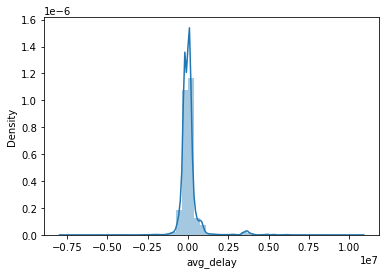

In [ ]:
sns.distplot(y_train)

In [ ]:
#we can seet that the distrubition of the  target column is substantially high at the center approximately -1000000 to 1000000 seconds
#which is close to 10-15 days

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [ ]:
grouped=pd.DataFrame(X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count())
grouped
#we stored the outcome of  X_train[name_customer] and X_train['doc_id'] in a new dataframe named grouped 
#getting number of documents per customer

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,99 CE,1
3,99 CE associates,1
4,99 CE co,1
...,...,...
3054,YEN BROS,1
3055,YEN BROS co,1
3056,YEN BROS corp,1
3057,YEN BROS corporation,2


### You can make another distribution plot of the "doc_id" column from x_train

C:\Users\nisch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

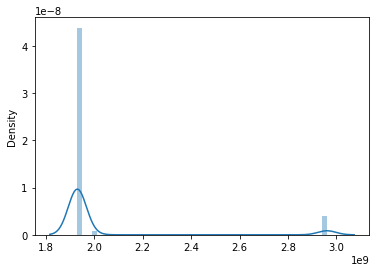

In [ ]:
plt.figure()
sns.distplot(x=X_train['doc_id'])

In [ ]:
#We conclude that the highest density lies near 1.9e+09 and we can see a small spike near 2.9
#we can see a correlation between this and business__year

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


C:\Users\nisch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

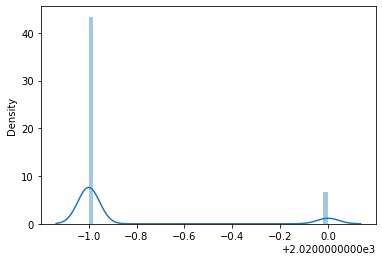

In [ ]:
plt.figure()
sns.distplot(x=X_train['buisness_year'])

In [ ]:
#We conclude that the highest density lies near -1.0+2.020e3(2019) and we can see a small spike near 0+2.020e3(2020)

C:\Users\nisch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nisch\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\nisch\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nisch\anaconda3\lib\site-packages\seaborn\distr

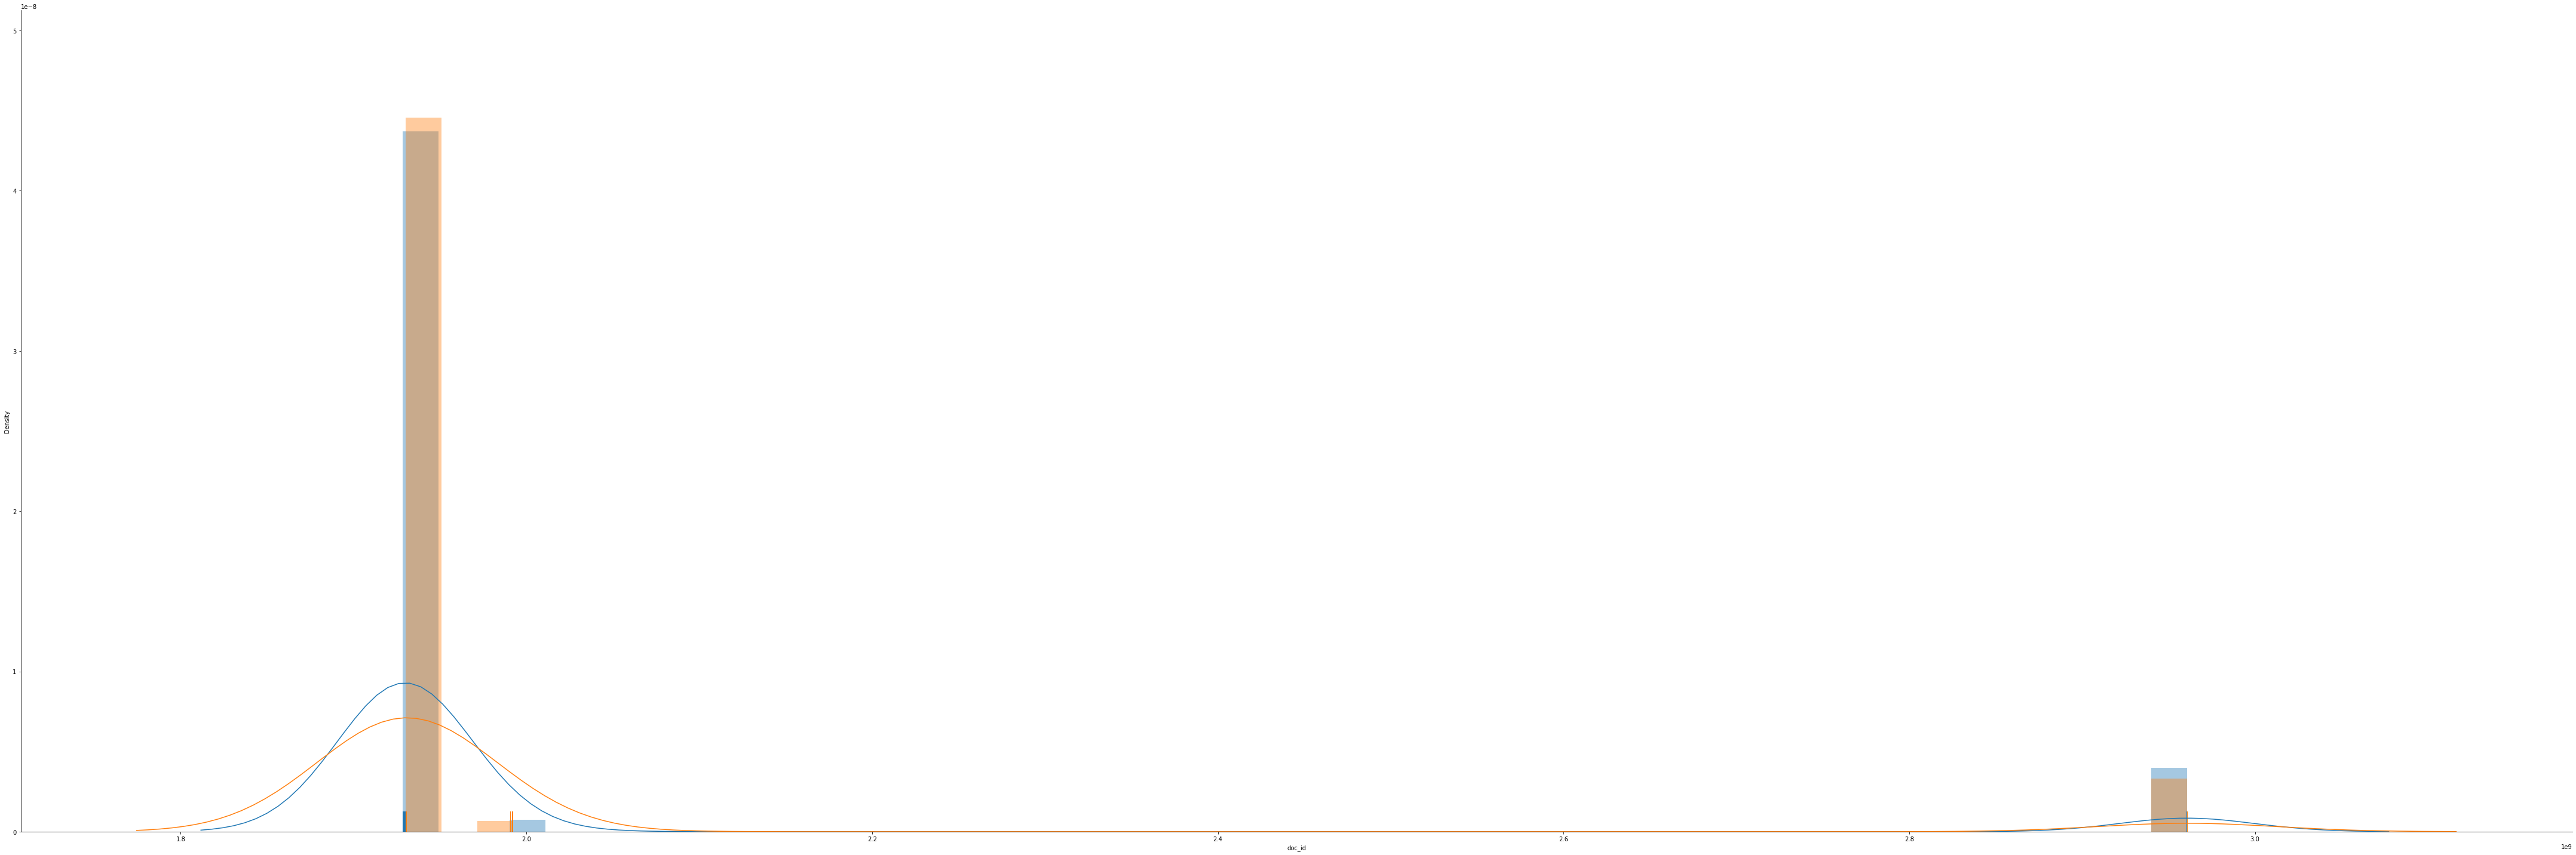

In [ ]:
g = sns.FacetGrid(X_train, hue="buisness_year", height=20, aspect=3)
g = g.map(sns.distplot, "doc_id",  hist=True, rug=True)


In [ ]:
#the density of -1.0+2.020e3 ie -1+2020= year 2019 is higher than the  density at 0.0 or year 2020 
#both business_year and doc_id graphs are almost identical

# Feature Engineering 

### Display and describe the X_train dataframe 

In [ ]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
33173,U001,0200769623,WAL-MAR trust,2019.0,1.929817e+09,2019-09-03,2019-09-18,2019-09-03,NAH4,68483.340
30787,CA02,0140104440,SO llc,2020.0,2.960615e+09,2020-02-22,2020-03-03,2020-02-22,CA10,86946.062
31285,U001,0200712105,WALG associates,2019.0,1.929603e+09,2019-07-09,2019-07-24,2019-07-09,NAA8,58345.440
8114,U001,0200418007,AM systems,2019.0,1.928657e+09,2019-01-24,2019-02-08,2019-01-24,NAA8,18667.200
28390,U001,0100031704,DELHAIZE corp,2019.0,1.930136e+09,2019-11-11,2019-11-26,2019-11-11,NAA8,15685.090
...,...,...,...,...,...,...,...,...,...,...
15472,U001,0200762301,C&S WH in,2020.0,1.930396e+09,2020-01-15,2020-01-30,2020-01-15,NAC6,26196.250
7023,U001,0200769623,WAL-MAR co,2019.0,1.928879e+09,2019-03-01,2019-03-16,2019-03-01,NAH4,42583.430
9972,U001,0200769623,WAL-MAR corporation,2019.0,1.929516e+09,2019-06-20,2019-07-05,2019-06-20,NAH4,10190.260
22264,U001,0200920735,ALBERT in,2019.0,1.929871e+09,2019-09-12,2019-09-27,2019-09-12,NAA8,68300.120


In [ ]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132502,2.013481e+09,30722.347254
std,0.339043,2.802342e+08,36688.784819
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929175e+09,4574.575000
50%,2019.000000,1.929733e+09,16836.875000
75%,2019.000000,1.930210e+09,45267.505000
max,2020.000000,2.960617e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [ ]:
##encoding business_code in all three sets

In [ ]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [ ]:
X_val['business_code_enc'] = business_coder.fit_transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.fit_transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [ ]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
33173,U001,1
30787,CA02,0
31285,U001,1
8114,U001,1
28390,U001,1
...,...,...
15472,U001,1
7023,U001,1
9972,U001,1
22264,U001,1


In [ ]:
#encoded business_code successsfully

#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [ ]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [ ]:
X_train ,X_val, X_test = custom(['business_code'])
#column business_code is dropped from train test and validate sets with  this function call

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [ ]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
#manually encoding string in cust_number in all three datasets and converting the column to integer 

#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [ ]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [ ]:
#new/unseen lables might pop up in test or validation sets

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [ ]:
#encoding name_customer using user defined func EncoderExt
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [ ]:
X_train ,X_val, X_test = custom(['name_customer'])
#as encoding of name_customer is done dropping column

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [ ]:
#encoding cust_payment_terms using user defined func EncoderExt
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [ ]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [ ]:
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [ ]:
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [ ]:
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [ ]:
#we have 3 columns with datetime64 as dtype -->posting_date due_in_date  baseline_create_date

### From the above output you can notice there are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [ ]:
#creating new features for day month year of posting date for all three datasets 

X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['posting_date'])
#dropping posting_date

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [ ]:
#creating new features for day month year of baseline_create_date for all three datasets 

X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['baseline_create_date'])
#dropping baseline_create_date

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [ ]:
#creating new features for day month year of due_in_date for all three datasets 

X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['due_in_date'])
#dropping due_in_date by passing it through user defined func 'custom'

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [ ]:
#printing dtypes of train, test and validate
print(X_train.dtypes,X_test.dtypes,X_val.dtypes)

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64


In [ ]:
#all dtypes null or int, dataset ready for feature selection 

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [ ]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

In [ ]:
#we have 16 faetures when variance threshold  is 0

- Note - Keep the code as it is, no need to change 


In [ ]:
#printing constant features if any 
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [ ]:
#checking fpr duplicated values in transpose of X_train
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values
#there are no duplicated values to be selected in the transpose matrix of X_train

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [ ]:
#user defined function to return features with correlation threshold >0.8
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [ ]:
#calling the fucn handling_correlation and passing 0.85 as treshold
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['day_of_createdate',
 'month_of_createdate',
 'year_of_createdate',
 'month_of_due',
 'year_of_due',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

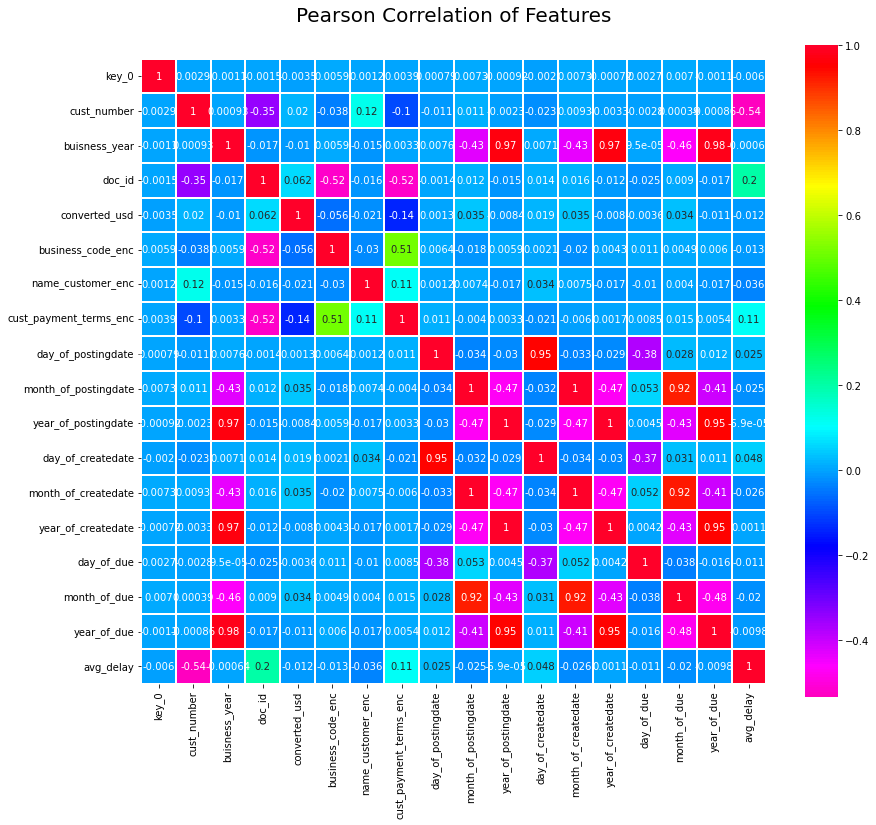

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [ ]:
#features which have a correlation away from 0 with avg_delay
#cust_number=-0.535198
#doc_id=+0.196890 but doc_id correlated with cust_number
#cust_paument_terms_enc=+0.107879
#----------------------------------


#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [ ]:
sel.variances_
#removes all low-variance features.

array([1.79900159e+15, 1.14945158e-01, 7.85278832e+16, 1.34600964e+09,
       2.83469699e-01, 1.05751521e+06, 1.27551546e+02, 7.61224423e+01,
       1.22514142e+01, 1.15544046e-01, 7.76774131e+01, 1.22569105e+01,
       1.15650537e-01, 7.59113559e+01, 1.20596747e+01, 1.18279943e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [ ]:
#creating lists to store evaluation metrics MSE R2 and  Algrithm for identifing the algorithm column for metrics
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.linear_model import LinearRegression
#storing Algo name  in Algorithm list
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
#storing the metrics in their respective lists
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
#calculating RMSE for validation set
predict_test1= regressor.predict(X_val)
#RMSE
mean_squared_error(y_val, predict_test1, squared=False)

531644.7115486132

### Display The Comparison Lists

In [ ]:
#displaying the  lists using iterating statement
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[293082118966.7813],[0.3331960095170663],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
sv=SVR()
sv.fit(X_train, y_train)
predictedsv = sv.predict(X_test)
#very time expensive

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predictedsv))
R2_Score.append(r2_score(y_test, predictedsv))

### Check the same for the Validation set also 

In [ ]:
predict_test2= sv.predict(X_val)
#RMSE
mean_squared_error(y_val, predict_test2, squared=False)

656043.0065386815

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[293082118966.7813, 442888058480.77563],[0.3331960095170663, -0.007634057558088214],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regressor')
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predictedt = dt.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predictedt))
R2_Score.append(r2_score(y_test, predictedt))

### Check the same for the Validation set also 

In [ ]:
predict_test3= dt.predict(X_val)
#RMSE
mean_squared_error(y_val, predict_test3, squared=False)

474008.80966821924

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor'],[293082118966.7813, 442888058480.77563, 227282954448.19452],[0.3331960095170663, -0.007634057558088214, 0.4828985762451635],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictedrf = rf.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predictedrf))
R2_Score.append(r2_score(y_test, predictedrf))

### Check the same for the Validation set also 

In [ ]:
predict_test4= rf.predict(X_val)
#RMSE
mean_squared_error(y_val, predict_test4, squared=False)

337175.0104439822

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],[293082118966.7813, 442888058480.77563, 227282954448.19452, 127804588216.1276],[0.3331960095170663, -0.007634057558088214, 0.4828985762451635, 0.7092261727703656],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [ ]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedxg = regressorfinal.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predictedxg))
R2_Score.append(r2_score(y_test, predictedxg))

### Check the same for the Validation set also 

In [ ]:
predict_test5= regressorfinal.predict(X_val)
#RMSE
mean_squared_error(y_val, predict_test5, squared=False)

338030.67140183673

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[293082118966.7813, 442888058480.77563, 227282954448.19452, 127804588216.1276, 120599657940.06805],[0.3331960095170663, -0.007634057558088214, 0.4828985762451635, 0.7092261727703656, 0.7256184258227341],

## You need to make the comparison list into a comparison dataframe 

In [ ]:
#creating a dictionary and  storing name:list as key value  pairs
data = {'Algorithm': Algorithm , 'MSE_Score': MSE_Score, 'R2_Score':R2_Score}  
#storing dictionary into dataframe
compare_list = pd.DataFrame(data)  
compare_list

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.930821e+11,0.333196
1,Support Vector Regression,4.428881e+11,-0.007634
2,Decision Tree Regressor,2.272830e+11,0.482899
3,Random Forest Regressor,1.278046e+11,0.709226
4,XGB Regressor,1.205997e+11,0.725618


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
#calculating RMSE
mean_squared_error(y_test,predictedfinal,squared=False)

347274.6145920661

### Calculate the mean Square Error for validation dataset

In [ ]:
mean_squared_error(y_val,predict_testfinal,squared=False)

338030.67140183673

In [ ]:
#the RMSE values for test and  validation datasets are close 

### Calculate the R2 score for test

In [ ]:
r2_score(y_test, predictedfinal)

0.7256184258227341

### Calculate the R2 score for Validation

In [ ]:
r2_score(y_val, predict_testfinal)

0.732961455863671

In [ ]:
#the R2score for test and validation dataset is similar and above 70% which is considered good for regression models

### Calculate the Accuracy for train Dataset 

In [ ]:
regressorfinal.score(X_train,y_train)

0.956388626721056

### Calculate the accuracy for validation

In [ ]:
regressorfinal.score(X_val,y_val)

0.732961455863671

### Calculate the accuracy for test

In [ ]:
regressorfinal.score(X_test,y_test)

0.7256184258227341

In [ ]:
#the accuracy is above 70% which is a decent percentage for model to be considered good

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

In [ ]:
#-->The Mean Square Error of XGB(1.205997e+11) was the least of all the models considered
#-->The R2_score was the highest at 72.56% just above the Random Forest Regressor
#-->XGBoost is gradient boosted tree algorithm, predicts target variable by combining estimates of simpler, weaker models. 
#-->based on boosting, new models are added to correct the errors made by existing models
#    highly efficient

In [ ]:
#There is very little  difference between the RMSE R2 values of train test and validate datasets which means
#the model is working properly without any overfitting or underfitting

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [ ]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [ ]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [ ]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


In [ ]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


In [ ]:
#all null values in clear_date "0 non-null"

### Storing the Nulldata into a different dataset 
# for BACKUP

In [ ]:
#copying nulldata ito nulldata1
nulldata1=nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
#storig the encoded business_code into business_code_enc collumn in the  dataframe
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/2056193214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])


### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
#manual encoding strings in cust_number
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/3565557172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [ ]:
#extracting day month year of cleardate, postingdate, dueindate, baselinecreatedate
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/621612317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/621612317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/621612317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
#encoding cust_payment_terms business_code name_customer using user defined func EncoderExt
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])

C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/3297370507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/3297370507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
C:\Users\nisch\AppData\Local\Temp/ipykernel_6248/3297370507.py:4: SettingWithCopyWarning: 
A value is trying to be

### Check for the datatypes of all the columns of Nulldata

In [ ]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [ ]:
#dropping unnecassry features
nulldata.drop(columns=['business_code',"baseline_create_date","due_in_date","posting_date",
                        "name_customer","clear_date","cust_payment_terms",'day_of_cleardate',
                        "month_of_cleardate","year_of_cleardate"],inplace=True)

C:\Users\nisch\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Check the information of the "nulldata" dataframe

In [ ]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [ ]:
X_test.info(nulldata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [ ]:
#a few columns in null data are not in required order

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [ ]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [ ]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [ ]:
#storing the  rearranged dataset into nulldata2
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [ ]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,66,2686,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,66,2774,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,66,89,20,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,66,2018,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,66,719,35,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,66,2968,33,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020.0,1.930851e+09,8899.71,66,2966,33,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020.0,1.930638e+09,4967.06,66,793,20,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020.0,1.930702e+09,1998.64,66,2733,20,25,3,2020,25,3,2020,9,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [ ]:
#XGB model predicting the avg_delay/final result
final_result = regressorfinal.predict(nulldata2)
final_result

array([ 490746.84,  645447.9 , 2075700.  , ..., -211611.48,  210686.03,
        187850.95], dtype=float32)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
#storing the array final_result into Series and naming it avg_delay
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [ ]:
final_result

0       4.907468e+05
1       6.454479e+05
2       2.075700e+06
3      -2.373616e+05
4      -2.037297e+05
            ...     
9676    4.133033e+05
9677    4.062847e+05
9678   -2.116115e+05
9679    2.106860e+05
9680    1.878510e+05
Name: avg_delay, Length: 9681, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
#merging dataframe nulldata1 and series final_result
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,4.907468e+05
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,6.454479e+05
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,2.075700e+06
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,-2.373616e+05
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-2.037297e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,4.133033e+05
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,4.062847e+05
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,-2.116115e+05
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,2.106860e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [ ]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
#calculating the  clear date in final dataset by adding duedate and predicted average delay
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [ ]:
Final['clear_date']

0      2020-04-15 16:19:06.843750
1      2020-04-10 11:17:27.875000
2      2020-04-19 00:35:00.000000
3      2020-04-27 06:03:58.359375
4      2020-04-23 15:24:30.328125
                  ...            
9676   2020-03-29 18:48:23.343750
9677   2020-05-22 16:51:24.656250
9678   2020-03-23 13:13:08.515625
9679   2020-04-11 10:31:26.031250
9680   2020-05-08 04:10:50.953125
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
#converrting the seconds of avg_delay into days  by usinng a lambda function 24*60*60sec=1day
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [ ]:
#displaying avg_delay in days
Final['avg_delay']

0        5.0
1        7.0
2       24.0
3       -3.0
4       -3.0
        ... 
9676     4.0
9677     4.0
9678    -3.0
9679     2.0
9680     2.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:
#creating bins with intervals of 15 until 60 and assigning Greater than  60 as label after that 
bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
#seperating elements into differnt bins
Final['Aging_Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [ ]:
#dropping avg_delay as we have calculated clear_date and also completed binning and key_0 as we dont need it 
Final=Final.drop(columns=['key_0','avg_delay'])

### Display the count of each categoty of new "Aging Bucket" column 

In [ ]:
Final['Aging_Bucket'].value_counts()
#getting a few NaN values because we did not create any buckets for -ve avg_delay 
#as we were told not to make changes to code

0-15               7240
16-30               273
31-45               183
Greatar than 60       7
46-60                 2
Name: Aging_Bucket, dtype: int64

In [ ]:
#majority of the invoices will be cleared within the first 15 days after due_date and very few will 
#456 invoices will be cleared between 16-45 days
#some invoives are predicted to take more than 45 days

### Display your final dataset with aging buckets 

In [ ]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging_Bucket
0,CA02,0140105686,SYSC llc,2020-04-15 16:19:06.843750,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-10 11:17:27.875000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-04-19 00:35:00.000000,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,16-30
3,U001,0200739534,OK systems,2020-04-27 06:03:58.359375,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,NaN
4,U001,0200353024,DECA corporation,2020-04-23 15:24:30.328125,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-29 18:48:23.343750,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,0-15
9677,U001,0200769623,WAL-MAR corporation,2020-05-22 16:51:24.656250,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,0-15
9678,U001,0200148860,DOLLA co,2020-03-23 13:13:08.515625,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,NaN
9679,U001,0200900909,SYSCO co,2020-04-11 10:31:26.031250,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,0-15


### Store this dataframe into the .csv format

In [ ]:
Final.to_csv('Final.csv')

# END OF THE PROJECT